In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("HousePricePrediction.csv")

# Printing first 10 records of the dataset
print(df.head(10))

   Id  MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  \
0   0          60       RL     8450    Inside     1Fam            5   
1   1          20       RL     9600       FR2     1Fam            8   
2   2          60       RL    11250    Inside     1Fam            5   
3   3          70       RL     9550    Corner     1Fam            5   
4   4          60       RL    14260       FR2     1Fam            5   
5   5          50       RL    14115    Inside     1Fam            5   
6   6          20       RL    10084    Inside     1Fam            5   
7   7          60       RL    10382    Corner     1Fam            6   
8   8          50       RM     6120    Inside     1Fam            5   
9   9         190       RL     7420    Corner   2fmCon            6   

   YearBuilt  YearRemodAdd Exterior1st  BsmtFinSF2  TotalBsmtSF  SalePrice  
0       2003          2003     VinylSd         0.0        856.0   208500.0  
1       1976          1976     MetalSd         0.0       1262.0 

In [31]:
df.shape

(2919, 13)

In [32]:
obj = (df.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))

int_ = (df.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))

fl = (df.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

Categorical variables: 4
Integer variables: 0
Float variables: 3


<AxesSubplot:>

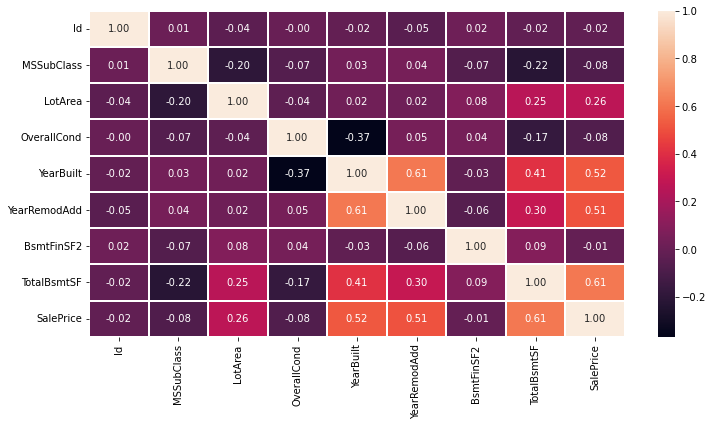

In [33]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(),fmt = '.2f',linewidths = 2,annot = True)

<AxesSubplot:title={'center':'No. Unique values of Categorical Features'}>

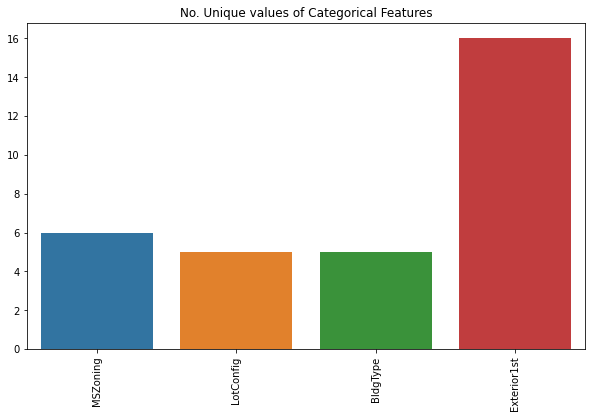

In [34]:
unique_values = []
for col in object_cols:
    unique_values.append(df[col].unique().size)
plt.figure(figsize=(10,6))
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=object_cols,y=unique_values)

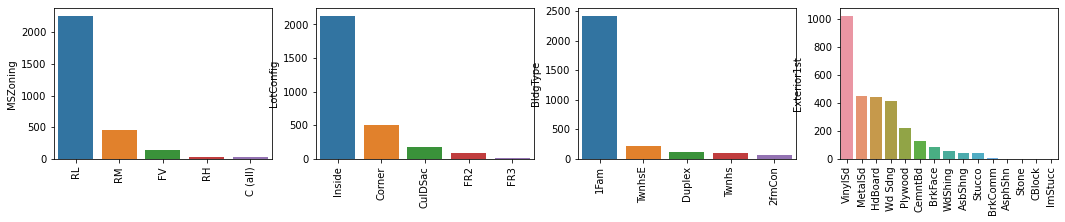

In [35]:
plt.figure(figsize=(18, 36))
plt.title('Categorical Features: Distribution')
plt.xticks(rotation=90)
index = 1
for col in object_cols:
    y = df[col].value_counts()
    plt.subplot(11, 4, index)
    plt.xticks(rotation=90)
    sns.barplot(x=list(y.index), y=y)
    index += 1

In [36]:
#Data Cleaning
df.drop(['Id'],axis=1,inplace=True)

In [37]:
df.isna().any()

MSSubClass      False
MSZoning         True
LotArea         False
LotConfig       False
BldgType        False
OverallCond     False
YearBuilt       False
YearRemodAdd    False
Exterior1st      True
BsmtFinSF2       True
TotalBsmtSF      True
SalePrice        True
dtype: bool

In [38]:
df.isna().sum()

MSSubClass         0
MSZoning           4
LotArea            0
LotConfig          0
BldgType           0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
Exterior1st        1
BsmtFinSF2         1
TotalBsmtSF        1
SalePrice       1459
dtype: int64

In [39]:
df['SalePrice'] = df['SalePrice'].fillna(df['SalePrice'].mean())

In [40]:
df1 = df.dropna()
df1.isna().sum()

MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

In [41]:
from sklearn.preprocessing import OneHotEncoder

s = (df1.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ',
    len(object_cols))

Categorical variables:
['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
No. of. categorical features:  4


In [42]:
OH_encoder = OneHotEncoder(sparse=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(df1[object_cols]))
OH_cols.index = df1.index
OH_cols.columns = OH_encoder.get_feature_names()
df2 = df1.drop(object_cols, axis=1)
df2 = pd.concat([df2, OH_cols], axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [43]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

X = df2.drop(['SalePrice'], axis=1)
Y = df2['SalePrice']

# Split the training set into
# training and validation set
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=42)

In [49]:
#Apply Linear Regression
from sklearn.linear_model import LinearRegression

model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
Y_pred = model_LR.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid, Y_pred))

0.20023501039964495
